**health_data 불러오기**

In [1]:
import pandas as pd
HD=pd.read_csv("https://raw.githubusercontent.com/iecsh10/IT_reno/main/health_data.csv")
HD.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


**폰트가 깨지면 이 블럭을 실행하세요**


In [2]:
##seaborn 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

###1.나이에 따른 평균 경향 : 콜레스테롤, 혈색소, 공복혈당


**나이에 따른 총콜레스테롤 평균수치 경향**

[(150.0, 220.0)]

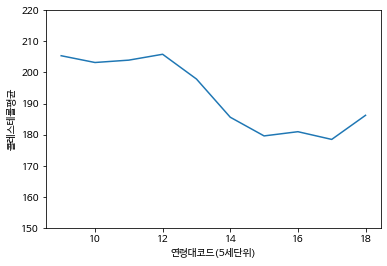

In [3]:
hd11=HD.groupby('연령대코드(5세단위)',as_index=False).agg(콜레스테롤평균=('총콜레스테롤','mean'))
import seaborn as sns 
sns.lineplot(data=hd11,x='연령대코드(5세단위)',y='콜레스테롤평균').set(ylim=(150,220))


연령이 증가할수록 대체로 콜레스테롤 수치가 낮다.

총콜레스테롤 수치의 정상치는 150~250mg/dL이며
보통 총 콜레스테롤 수치가 200mg/DL을 넘어가면 병원 진단이 권장된다. 

연령이 증가할수록 콜레스테롤 수치가 낮은 이유로는

*   젊은 사람과 연로한 사람의 식습관의 차이
*   콜레스테롤이 높을수록 빨리 죽어서 노년까지 살아남으신 분의 콜레스테롤이 낮다


정도로 추측된다.


**나이에 따른 혈색소 평균수치 경향**

[(12.0, 15.0)]

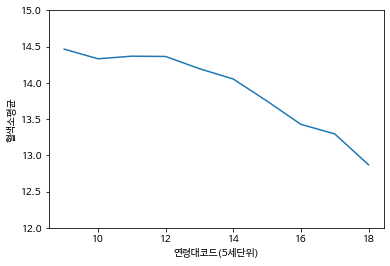

In [4]:
hd12=HD.groupby('연령대코드(5세단위)',as_index=False).agg(혈색소평균=('혈색소','mean'))
import seaborn as sns 
sns.lineplot(data=hd12,x='연령대코드(5세단위)',y='혈색소평균').set(ylim=(12,15))

연령이 증가할수록 대체로 혈색소 수치가 낮다

혈색소는 혈중의 산소를 운반하며, 

혈색소수치가 낮을수록 빈혈이나 어지럼증을 겪을 수 있다. 

따라서 연로할수록 빈혈의심증세를 면밀히 살펴야 한다.



**나이에 따른 공복혈당 평균수치 경향**

[(90.0, 120.0)]

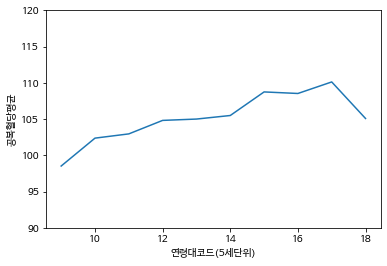

In [5]:
hd13=HD.groupby('연령대코드(5세단위)',as_index=False).agg(공복혈당평균=('식전혈당(공복혈당)','mean'))
import seaborn as sns 
sns.lineplot(data=hd13,x='연령대코드(5세단위)',y='공복혈당평균').set(ylim=(90,120))

연령이 증가할수록 대체로 공복혈당 수치가 높다

공복혈당이 126mg/DL 이상이면 당뇨병으로 판정하며, 

100~125mg/DL이면 당뇨 위험군으로 의심할 수 있다. 

연령대 17 그룹은 80~84세, 연령대 18 그룹은 85세 이상을 의미해 특수한 상황이므로 

연령대 코드 17 이후의 선 그래프가 하락하고 있더라도

연령증가에 따른 공복혈당 상승 경향성을 무시할 수 없다 

###2.성별에 따른 평균수치의 비교 : 콜레스테롤, 혈색소

**성별에 따른 총콜레스테롤 수치의 차이**

[(175.0, 210.0)]

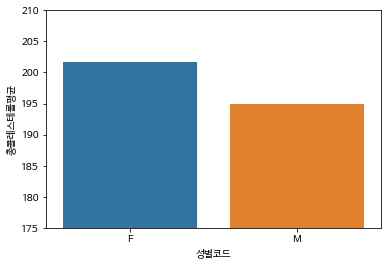

In [6]:
hd2=HD.groupby('성별코드',as_index=False).agg(총콜레스테롤평균=('총콜레스테롤','mean'))
import seaborn as sns 
sns.barplot(data=hd2,x='성별코드',y='총콜레스테롤평균').set(ylim=(175,210))

성별에 따라 총콜레스테롤 평균에는 차이가 있다. 

여성의 총콜레스테롤 수치가 비교적 높다.

In [7]:
hd2=HD[['성별코드','총콜레스테롤']]
hd1F=hd2[hd2['성별코드']=="F"]
hd1M=hd2[hd2['성별코드']=="M"]
#결측치제거
hd1M=hd1M.dropna(axis=0)
hd1F=hd1F.dropna(axis=0)
hd1M=hd1M[['총콜레스테롤']]
hd1F=hd1F[['총콜레스테롤']]

import scipy.stats
print(scipy.stats.ttest_ind(hd1M,hd1F,equal_var=True))
print(scipy.stats.ttest_ind(hd1M,hd1F,equal_var=False))

#정규성 ; 표본이 많으니까 정규분포를 따른다고 가정 가능
#등분산성 :레베네 등분산 test를 해야하는데 코드가 잘 안돌아가서
#등분산과 이분산을 모두 가정해 돌려보기로 함

#p-value:0.000000366으로 5%유의확률에서
#두 집단은 충분이 차이가 남 

Ttest_indResult(statistic=array([-5.09398743]), pvalue=array([3.66609e-07]))
Ttest_indResult(statistic=array([-5.09398968]), pvalue=array([3.66604899e-07]))


그래프 뿐만 아니라 통계적으로도 그 차이가 유의한지 t-검정을 통해 확인했다.

t통계량의 p-value가 0.05이하이므로 
5%유의수준에서 두 그룹의 차이는 충분히 유의하다

따라서 성별에 따라 총콜레스테롤 수치가 다르다는 판단은 타당하다. 

**성별에 따른 혈색소 수치의 차이**

[(10.0, 16.0)]

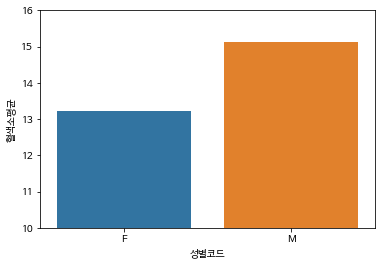

In [8]:
import pandas as pd
HD=pd.read_csv("https://raw.githubusercontent.com/iecsh10/IT_reno/main/health_data.csv")

#바 플롯
hd2=HD.groupby('성별코드',as_index=False).agg(혈색소평균=('혈색소','mean'))
import seaborn as sns 
sns.barplot(data=hd2,x='성별코드',y='혈색소평균').set(ylim=(10,16))

성별에 따라 혈색소 수치에는 차이가 있으며

남성의 혈색소 수치가 더욱 높다.

여성이 겪는 빈혈이나 월경이 혈색소 수치에 영향을 주고 있다는 직감이 들지만

정확하게 알려면 또 다른 자료와 분석이 필요하다. 

In [9]:
hd2=HD[['성별코드','혈색소']]
hd1F=hd2[hd2['성별코드']=="F"]
hd1M=hd2[hd2['성별코드']=="M"]
#결측치제거
hd1M=hd1M.dropna(axis=0)
hd1F=hd1F.dropna(axis=0)
hd1M=hd1M[['혈색소']]
hd1F=hd1F[['혈색소']]

import scipy.stats
print(scipy.stats.ttest_ind(hd1M,hd1F,equal_var=True))
print(scipy.stats.ttest_ind(hd1M,hd1F,equal_var=False))

#정규성 ; 표본이 많으니까 정규분포를 따른다고 가정 가능
#등분산성 :레베네 등분산 test를 해야하는데 코드가 잘 안돌아가서
#등분산과 이분산을 모두 가정해 돌려보기로 함

#등분산과 이분산인 경우 모두 p-value<0.05로
#5%유의수준에서 귀무가설 기각
#두 집단의 차이가 유의


Ttest_indResult(statistic=array([77.37271979]), pvalue=array([0.]))
Ttest_indResult(statistic=array([77.49383056]), pvalue=array([0.]))


그래프 뿐만 아니라 통계적으로도 그 차이가 유의한지 t-검정을 통해 확인했다.

t통계량의 p-value가 0.05이하이므로 
5%유의수준에서 두 그룹의 차이는 충분히 유의하다

따라서 성별에 따라 혈색소 수치가 다르다는 판단은 타당하다. 

###3.데이터끼리의 관계 : 총콜레스테롤과 LDL콜레스테롤

**cf)산점도 위 적합선을 그리기 위한 회귀식 계산**

In [10]:
#연속형변수에 대해 회귀분석
#자료 둘러보기 및 적합선에 사용할 회귀식 구하기 위함
#그냥 회귀계수 유의성과 부호만 보고 적합선 그리는데 참고용

#lm(총콜레스테롤~LDL콜레스테롤,data=HD)
hd3=HD[['총콜레스테롤','LDL콜레스테롤']]
hd3=hd3.dropna(axis=0) #결측치 제거
from statsmodels.formula.api import ols
fit1 = ols('총콜레스테롤 ~ LDL콜레스테롤', data=hd3).fit()
print(fit1.summary())

#lm(총콜레스테롤~HDL콜레스테롤,data=HD)
hd4=HD[['총콜레스테롤','HDL콜레스테롤']]
hd4=hd4.dropna(axis=0) #결측치 제거
fit2 = ols('총콜레스테롤 ~ HDL콜레스테롤', data=hd4).fit()
print(fit2.summary())

#lm(총콜레스테롤~HDL콜레스테롤+LDL콜레스테롤,data=HD)
hd5=HD[['총콜레스테롤','HDL콜레스테롤','LDL콜레스테롤']]
hd5=hd5.dropna(axis=0) #결측치 제거
fit3 = ols('총콜레스테롤 ~ HDL콜레스테롤+LDL콜레스테롤', data=hd5).fit()
print(fit3.summary())


                            OLS Regression Results                            
Dep. Variable:                 총콜레스테롤   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 2.527e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:42:24   Log-Likelihood:                -16521.
No. Observations:                3977   AIC:                         3.305e+04
Df Residuals:                    3975   BIC:                         3.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.3331      0.790     99.125      0.0


오차의 정규성 (Jarque-Bera)의 p-value<0.05 => 충분히 지켜짐

오차의 독립성 : 더빈왓슨 값이 2 언저리 => 충분히 지켜짐

오차의 등분산성 : 잔차산점도로 확인 필요


*   x=LDL콜레스테롤,y=총콜레스테롤인 경우
    
    회귀계수 1.0275 (p-value<0.05)  설명력 0.864
*   x=HDL콜레스테롤,y=총콜레스테롤인 경우

    회귀계수 0.6810 (p-value<0.05), 설명력 0.055 #낮음
*   x_1=HDL콜레스테롤,x_2=LDL콜레스테롤,y=총콜레스테롤인 경우

    HDL콜레스테롤 회귀계수 = 0.628,LDL콜레스테롤 회귀계수 = 1.0186, 설명력 0.911

    HDL콜레스테롤과 LDL콜레스테롤 모두 총콜레스테롤에 양의 방향으로 영향을 주지만

    총콜레스테롤에 가장많이 영향을 주는 요소는 LDL콜레스테롤이다. 


**LDL콜레스테롤과 총콜레스테롤의 산점도**

Text(0, 0.5, '총콜레스테롤')

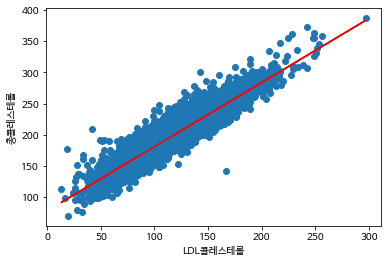

In [11]:
from matplotlib import pyplot as plt
plt.scatter(hd3['LDL콜레스테롤'],hd3['총콜레스테롤'])
plt.plot(hd3['LDL콜레스테롤'],fit1.fittedvalues,color='red')
plt.xlabel('LDL콜레스테롤');plt.ylabel('총콜레스테롤')

x, y변수가 선형관계를 이루고 있다. 


LDL콜레스테롤이 높을 수록 총콜레스테롤이 높다

LDL콜레스테롤은 동맥경화와 심장병을 유발하는 '나쁜 콜레스테롤'이라는 별명으로 불린다고 한다.

**HDL콜레스테롤과 총콜레스테롤의 산점도**

Text(0, 0.5, '총콜레스테롤')

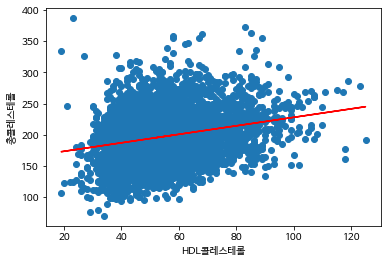

In [12]:
from matplotlib import pyplot as plt
plt.scatter(hd4['HDL콜레스테롤'],hd4['총콜레스테롤'])
plt.plot(hd4['HDL콜레스테롤'],fit2.fittedvalues,color='red')
plt.xlabel('HDL콜레스테롤');plt.ylabel('총콜레스테롤')

앞선 회귀분석의 설명력이 낮았는데, 산점도를 그려보니 역시 점이 일렬이기보다는 퍼져있는 형태이다. 

HDL콜레스테롤과 총콜레스테롤은 어느정도 양의 상관관계가 있다.

HDL콜레스테롤은 혈액의 콜레스테롤을 운반해 간으로 이동시키며 동맥경화의 위험을 낮추어준다
